<a href="https://colab.research.google.com/github/leejeongeun97/dataAnalysis/blob/main/2_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_03_%EA%B3%B5%EA%B3%B5%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%97%B0%EB%A0%B9%EB%8C%80%EB%B3%84%EC%9D%B8%EA%B5%AC%ED%98%84%ED%99%A9%EB%B6%84%EC%84%9D_%EB%B0%B0%ED%8F%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 한글폰트 설정 및 라이브러리 임포트

In [1]:
# 코드 실행 후 재시작
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (6,614 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121752 files and dire

# 필요한 라이브러리 import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 멧플롯립 한글폰트 지정
plt.rc('font', family='NanumBarunGothic')
#plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

# 2024년 연령대별 현황
 - 2024년 연령대별 인구수 확인하기
 - https://jumin.mois.go.kr/#  연령별 인구현황 > 연령 구분 단위를 1세로 변경해서 조회하기

## 파일 읽어서 데이터프레임 생성하기

In [44]:
filename='202403_202403_연령별인구현황_월간.csv'
df = pd.read_csv(filename, encoding='cp949')
df.head()

,행정구역,2024년03월_계_총인구수,2024년03월_계_연령구간인구수,2024년03월_계_0세,2024년03월_계_1세,2024년03월_계_2세,2024년03월_계_3세,2024년03월_계_4세,2024년03월_계_5세,2024년03월_계_6세,...,2024년03월_여_91세,2024년03월_여_92세,2024년03월_여_93세,2024년03월_여_94세,2024년03월_여_95세,2024년03월_여_96세,2024년03월_여_97세,2024년03월_여_98세,2024년03월_여_99세,2024년03월_여_100세 이상
0,전국 (0000000000),"51,293,934","51,293,934","220,719","249,583","264,689","275,585","300,207","327,046","356,089",...,"47,354","37,054","27,964","22,769","16,916","12,154","8,109","5,114","3,252","7,214"
1,서울특별시 (1100000000),"9,384,739","9,384,739","36,904","40,232","42,550","43,198","46,125","49,533","53,402",...,"6,555","5,233","3,976","3,343","2,545","1,850","1,270",731,534,"1,154"
2,부산광역시 (2600000000),"3,287,292","3,287,292","12,149","14,068","15,074","15,438","17,162","18,984","21,253",...,"2,717","2,210","1,463","1,256","1,014",803,447,319,178,375
3,대구광역시 (2700000000),"2,369,962","2,369,962","9,170","10,495","11,464","11,876","13,618","14,876","16,667",...,"2,028","1,605","1,194",886,659,468,305,180,103,232
4,인천광역시 (2800000000),"3,006,045","3,006,045","13,719","15,887","16,561","17,280","18,692","20,372","21,305",...,"2,357","1,807","1,481","1,121",912,612,440,305,203,387


## 데이터 속성을 탐색

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Columns: 310 entries, 행정구역 to 2024년03월_여_100세 이상
dtypes: int64(2), object(308)
memory usage: 43.7+ KB


## 데이터 전처리

### 행정구역을 인덱스로 설정하기

In [45]:
df.set_index('행정구역',inplace=True)
df.head(3)

,2024년03월_계_총인구수,2024년03월_계_연령구간인구수,2024년03월_계_0세,2024년03월_계_1세,2024년03월_계_2세,2024년03월_계_3세,2024년03월_계_4세,2024년03월_계_5세,2024년03월_계_6세,2024년03월_계_7세,...,2024년03월_여_91세,2024년03월_여_92세,2024년03월_여_93세,2024년03월_여_94세,2024년03월_여_95세,2024년03월_여_96세,2024년03월_여_97세,2024년03월_여_98세,2024년03월_여_99세,2024년03월_여_100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,
전국 (0000000000),"51,293,934","51,293,934","220,719","249,583","264,689","275,585","300,207","327,046","356,089","399,604",...,"47,354","37,054","27,964","22,769","16,916","12,154","8,109","5,114","3,252","7,214"
서울특별시 (1100000000),"9,384,739","9,384,739","36,904","40,232","42,550","43,198","46,125","49,533","53,402","60,089",...,"6,555","5,233","3,976","3,343","2,545","1,850","1,270",731,534,"1,154"
부산광역시 (2600000000),"3,287,292","3,287,292","12,149","14,068","15,074","15,438","17,162","18,984","21,253","23,758",...,"2,717","2,210","1,463","1,256","1,014",803,447,319,178,375


### 남자 연령대별 인구 현황을 데이터프레임으로 생성하기


#### 데이터프레임 생성하기
   - 남자 연령대별 인구수 컬럼 가져오기

In [46]:
df.columns   # 컬럼명 보기

Index(['2024년03월_계_총인구수', '2024년03월_계_연령구간인구수', '2024년03월_계_0세',
       '2024년03월_계_1세', '2024년03월_계_2세', '2024년03월_계_3세', '2024년03월_계_4세',
       '2024년03월_계_5세', '2024년03월_계_6세', '2024년03월_계_7세',
       ...
       '2024년03월_여_91세', '2024년03월_여_92세', '2024년03월_여_93세', '2024년03월_여_94세',
       '2024년03월_여_95세', '2024년03월_여_96세', '2024년03월_여_97세', '2024년03월_여_98세',
       '2024년03월_여_99세', '2024년03월_여_100세 이상'],
      dtype='object', length=309)

In [47]:
#df_m = 남자 연령대별 컬럼에 해당하는 데이터만 가져오려면?
df_m = df.loc[:,df.columns.str.contains('남')]
df_m.head()


,2024년03월_남_총인구수,2024년03월_남_연령구간인구수,2024년03월_남_0세,2024년03월_남_1세,2024년03월_남_2세,2024년03월_남_3세,2024년03월_남_4세,2024년03월_남_5세,2024년03월_남_6세,2024년03월_남_7세,...,2024년03월_남_91세,2024년03월_남_92세,2024년03월_남_93세,2024년03월_남_94세,2024년03월_남_95세,2024년03월_남_96세,2024년03월_남_97세,2024년03월_남_98세,2024년03월_남_99세,2024년03월_남_100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,
전국 (0000000000),"25,547,370","25,547,370","113,031","127,848","135,377","141,194","153,990","167,862","183,101","204,642",...,"15,772","11,160","7,467","5,858","4,112","2,740","1,647",917,659,"1,542"
서울특별시 (1100000000),"4,536,128","4,536,128","19,008","20,429","21,977","22,073","23,946","25,776","27,218","30,713",...,"2,681","1,889","1,320","1,088",813,524,323,164,119,346
부산광역시 (2600000000),"1,601,773","1,601,773","6,239","7,245","7,729","7,973","8,790","9,597","11,031","12,059",...,876,654,396,333,223,150,84,41,28,67
대구광역시 (2700000000),"1,163,911","1,163,911","4,735","5,373","5,842","6,151","7,032","7,684","8,481","9,738",...,769,515,279,201,140,109,53,28,24,35
인천광역시 (2800000000),"1,502,956","1,502,956","7,091","8,102","8,440","8,862","9,697","10,432","11,077","12,241",...,709,488,362,263,216,134,96,38,39,100


#### 컬럼명 변경하기

In [48]:
#df_m.columns = 컬럼명 변경하는 방법은? ('2024년03월_남_'부분을 --> ''로 변경하기)
df_m.columns = df_m.columns.str.replace('2024년03월_남_','')
df_m.head()

,총인구수,연령구간인구수,0세,1세,2세,3세,4세,5세,6세,7세,...,91세,92세,93세,94세,95세,96세,97세,98세,99세,100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,
전국 (0000000000),"25,547,370","25,547,370","113,031","127,848","135,377","141,194","153,990","167,862","183,101","204,642",...,"15,772","11,160","7,467","5,858","4,112","2,740","1,647",917,659,"1,542"
서울특별시 (1100000000),"4,536,128","4,536,128","19,008","20,429","21,977","22,073","23,946","25,776","27,218","30,713",...,"2,681","1,889","1,320","1,088",813,524,323,164,119,346
부산광역시 (2600000000),"1,601,773","1,601,773","6,239","7,245","7,729","7,973","8,790","9,597","11,031","12,059",...,876,654,396,333,223,150,84,41,28,67
대구광역시 (2700000000),"1,163,911","1,163,911","4,735","5,373","5,842","6,151","7,032","7,684","8,481","9,738",...,769,515,279,201,140,109,53,28,24,35
인천광역시 (2800000000),"1,502,956","1,502,956","7,091","8,102","8,440","8,862","9,697","10,432","11,077","12,241",...,709,488,362,263,216,134,96,38,39,100


In [10]:
df_m.dtypes

총인구수       object
연령구간인구수    object
0세         object
1세         object
2세         object
            ...  
96세        object
97세        object
98세         int64
99세         int64
100세 이상    object
Length: 103, dtype: object

#### 데이터 타입 변경하기
- 문자열을 정수형으로 변경하기

In [28]:
from pandas.core.dtypes.api import is_numeric_dtype

def s(st):
  if is_numeric_dtype(st):
    return st

  else:
    return st.replace(',', '')

df_m.iloc[3].apply(s).astype(int)

AttributeError: 'int' object has no attribute 'replace'

In [49]:
# 문자열을 정수로 변경하기
#df_m.iloc[0] =
df_m = df_m.replace(',', '', regex=True).astype(int)
df_m.head()

,총인구수,연령구간인구수,0세,1세,2세,3세,4세,5세,6세,7세,...,91세,92세,93세,94세,95세,96세,97세,98세,99세,100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,
전국 (0000000000),25547370,25547370,113031,127848,135377,141194,153990,167862,183101,204642,...,15772,11160,7467,5858,4112,2740,1647,917,659,1542
서울특별시 (1100000000),4536128,4536128,19008,20429,21977,22073,23946,25776,27218,30713,...,2681,1889,1320,1088,813,524,323,164,119,346
부산광역시 (2600000000),1601773,1601773,6239,7245,7729,7973,8790,9597,11031,12059,...,876,654,396,333,223,150,84,41,28,67
대구광역시 (2700000000),1163911,1163911,4735,5373,5842,6151,7032,7684,8481,9738,...,769,515,279,201,140,109,53,28,24,35
인천광역시 (2800000000),1502956,1502956,7091,8102,8440,8862,9697,10432,11077,12241,...,709,488,362,263,216,134,96,38,39,100


In [33]:
df_m.head(1)


,총인구수,연령구간인구수,0세,1세,2세,3세,4세,5세,6세,7세,...,91세,92세,93세,94세,95세,96세,97세,98세,99세,100세 이상
0,25547370,25547370,113031,127848,135377,141194,153990,167862,183101,204642,...,15772,11160,7467,5858,4112,2740,1647,917,659,1542


### 여자 연령대별 인구 현황을 데이터프레임으로 생성하기

#### 데이터프레임 생성하기
   - 여자 연령대별 인구수 컬럼 가져오기

In [50]:
df_w = df.loc[:,df.columns.str.contains('여')]
df_w.head()

,2024년03월_여_총인구수,2024년03월_여_연령구간인구수,2024년03월_여_0세,2024년03월_여_1세,2024년03월_여_2세,2024년03월_여_3세,2024년03월_여_4세,2024년03월_여_5세,2024년03월_여_6세,2024년03월_여_7세,...,2024년03월_여_91세,2024년03월_여_92세,2024년03월_여_93세,2024년03월_여_94세,2024년03월_여_95세,2024년03월_여_96세,2024년03월_여_97세,2024년03월_여_98세,2024년03월_여_99세,2024년03월_여_100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,
전국 (0000000000),"25,746,564","25,746,564","107,688","121,735","129,312","134,391","146,217","159,184","172,988","194,962",...,"47,354","37,054","27,964","22,769","16,916","12,154","8,109","5,114","3,252","7,214"
서울특별시 (1100000000),"4,848,611","4,848,611","17,896","19,803","20,573","21,125","22,179","23,757","26,184","29,376",...,"6,555","5,233","3,976","3,343","2,545","1,850","1,270",731,534,"1,154"
부산광역시 (2600000000),"1,685,519","1,685,519","5,910","6,823","7,345","7,465","8,372","9,387","10,222","11,699",...,"2,717","2,210","1,463","1,256","1,014",803,447,319,178,375
대구광역시 (2700000000),"1,206,051","1,206,051","4,435","5,122","5,622","5,725","6,586","7,192","8,186","9,208",...,"2,028","1,605","1,194",886,659,468,305,180,103,232
인천광역시 (2800000000),"1,503,089","1,503,089","6,628","7,785","8,121","8,418","8,995","9,940","10,228","11,837",...,"2,357","1,807","1,481","1,121",912,612,440,305,203,387


#### 컬럼명 변경하기

In [51]:
df_w.columns = df_m.columns.str.replace('2024년03월_여_','')
df_w.head()

,총인구수,연령구간인구수,0세,1세,2세,3세,4세,5세,6세,7세,...,91세,92세,93세,94세,95세,96세,97세,98세,99세,100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,
전국 (0000000000),"25,746,564","25,746,564","107,688","121,735","129,312","134,391","146,217","159,184","172,988","194,962",...,"47,354","37,054","27,964","22,769","16,916","12,154","8,109","5,114","3,252","7,214"
서울특별시 (1100000000),"4,848,611","4,848,611","17,896","19,803","20,573","21,125","22,179","23,757","26,184","29,376",...,"6,555","5,233","3,976","3,343","2,545","1,850","1,270",731,534,"1,154"
부산광역시 (2600000000),"1,685,519","1,685,519","5,910","6,823","7,345","7,465","8,372","9,387","10,222","11,699",...,"2,717","2,210","1,463","1,256","1,014",803,447,319,178,375
대구광역시 (2700000000),"1,206,051","1,206,051","4,435","5,122","5,622","5,725","6,586","7,192","8,186","9,208",...,"2,028","1,605","1,194",886,659,468,305,180,103,232
인천광역시 (2800000000),"1,503,089","1,503,089","6,628","7,785","8,121","8,418","8,995","9,940","10,228","11,837",...,"2,357","1,807","1,481","1,121",912,612,440,305,203,387


In [ ]:
df_w.dtypes

#### 데이터 타입 변경하기
- 문자열을 정수형으로 변경하기

In [52]:
#df_w.iloc[0]=
df_w = df_m.replace(',', '', regex=True).astype(int)
df_w.head(1)

,총인구수,연령구간인구수,0세,1세,2세,3세,4세,5세,6세,7세,...,91세,92세,93세,94세,95세,96세,97세,98세,99세,100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,
전국 (0000000000),25547370,25547370,113031,127848,135377,141194,153990,167862,183101,204642,...,15772,11160,7467,5858,4112,2740,1647,917,659,1542


## 데이터 시각화


### 연령대별 인구 현황
- 가로 막대 그래프


In [38]:
df_m.columns

Index(['총인구수', '연령구간인구수', '0세', '1세', '2세', '3세', '4세', '5세', '6세', '7세',
       ...
       '91세', '92세', '93세', '94세', '95세', '96세', '97세', '98세', '99세',
       '100세 이상'],
      dtype='object', length=103)

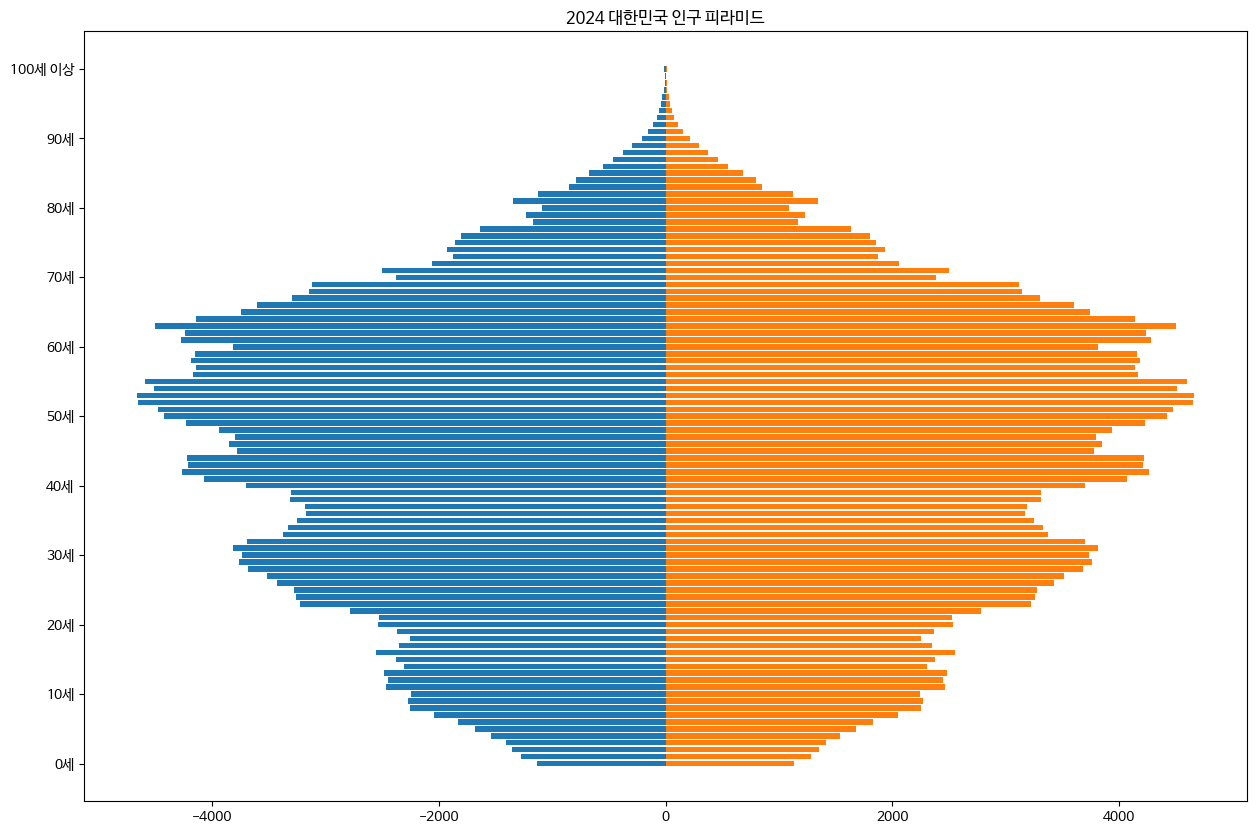

In [54]:
plt.figure(figsize=(15, 10))

#총인구수와 연령구간인구수 제거
new_mdf = df_m.drop(df_m.columns[[0, 1]], axis=1)
new_wdf = df_w.drop(df_w.columns[[0, 1]], axis=1)

plt.barh(new_mdf.columns, -new_mdf.iloc[0]//100) #천 단위
plt.barh(new_wdf.columns, new_wdf.iloc[0]//100)

plt.yticks(np.arange(0, 110, 10))

plt.title('2024 대한민국 인구 피라미드')
plt.savefig('2024_인구피라미드.png', dpi=100)
plt.show()